<a href="https://colab.research.google.com/github/RMoulla/PYK_Strasbourg/blob/main/TP_german_credit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP — Analyse des données de crédit

## Introduction

Dans ce TP, nous travaillons sur un jeu de données réel issu du domaine bancaire, couramment appelé **German Credit Data**.  
Il décrit des demandes de crédit effectuées par des clients, à partir d’informations socio-démographiques, financières et liées à l’objet du crédit.

L’objectif de ce TP est double :

1. analyser et comprendre la structure et la qualité des données ;
2. étudier l’impact du traitement des valeurs manquantes sur une analyse statistique.

---

## Description des variables

Chaque ligne du jeu de données correspond à **un client** ayant effectué une demande de crédit.

### Variables socio-démographiques

- **Age**  
  Âge du client, exprimé en années.

- **Sex**  
  Sexe du client.  
  Modalités possibles : `male`, `female`.

- **Job**  
  Niveau de qualification professionnelle du client (variable codée numériquement).  
  Interprétation usuelle :
  - `0` : non qualifié et sans emploi stable  
  - `1` : non qualifié avec emploi  
  - `2` : qualifié  
  - `3` : hautement qualifié  

---

### Variables liées au logement et à la situation financière

- **Housing**  
  Situation de logement du client.  
  Modalités possibles :
  - `own` : propriétaire  
  - `rent` : locataire  
  - `free` : hébergé gratuitement  

- **Saving accounts**  
  Niveau d’épargne du client.  
  Modalités possibles :
  - `little`
  - `moderate`
  - `rich`
  - `quite rich`  

- **Checking account**  
  Niveau du compte courant du client.  
  Modalités possibles :
  - `little`
  - `moderate`
  - `rich`  

---

### Variables liées au crédit

- **Credit amount**  
  Montant du crédit demandé (en unités monétaires).  
  → Variable cible dans ce TP.

- **Duration**  
  Durée du crédit, exprimée en mois.

- **Purpose**  
  Objet du crédit.  
  Exemples de modalités :
  - `car`
  - `radio/TV`
  - `education`
  - `furniture/equipment`
  - `business`
  - etc.

---

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 120)


## Chargement des données

In [ ]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
df.drop(columns="Unnamed: 0", inplace=True)

## Vue d’ensemble

In [ ]:
print("Shape:", df.shape)

Shape: (1000, 9)


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Valeurs manquantes

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Checking account,394
Saving accounts,183


In [ ]:
df[df['Saving accounts'].isna()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
5,35,male,1,free,NaN,NaN,9055,36,education
16,53,male,2,own,NaN,NaN,2424,24,radio/TV
17,25,male,2,own,NaN,little,8072,30,business
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment
...,...,...,...,...,...,...,...,...,...
968,29,male,2,rent,NaN,NaN,7166,42,radio/TV
977,42,male,2,own,NaN,moderate,2427,18,business
990,37,male,1,own,NaN,NaN,3565,12,education
992,23,male,1,rent,NaN,little,1936,18,radio/TV


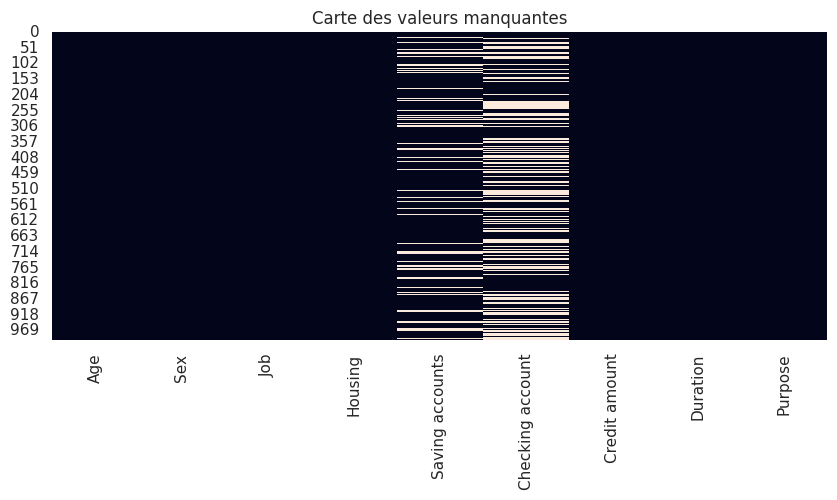

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Carte des valeurs manquantes")
plt.show()

## Séparation numériques / catégorielles

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numériques:", len(num_cols), num_cols)
print("Catégorielles:", len(cat_cols), cat_cols)

Numériques: 4 ['Age', 'Job', 'Credit amount', 'Duration']
Catégorielles: 5 ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


## Analyse univariée — Numériques

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


### Distributions (histogrammes + KDE)

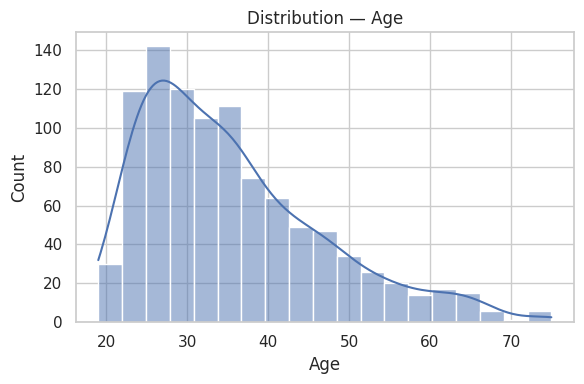

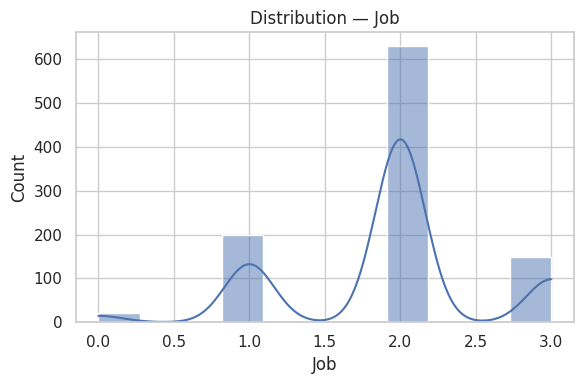

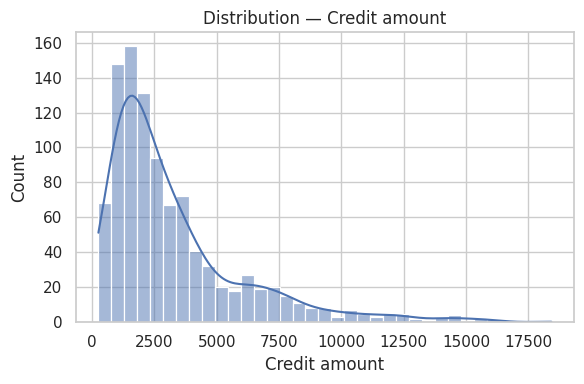

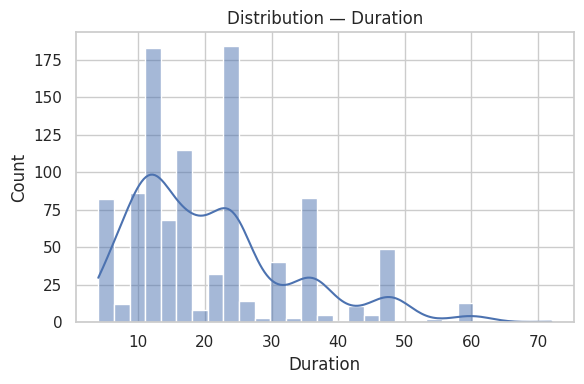

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution — {col}")
    plt.tight_layout()
    plt.show()

### 5.2) Boxplots (détection d’outliers)

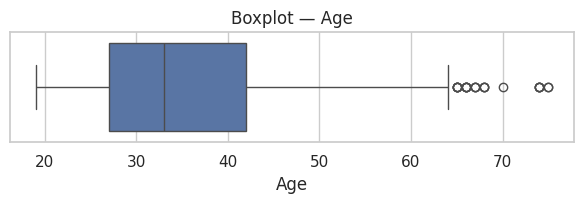

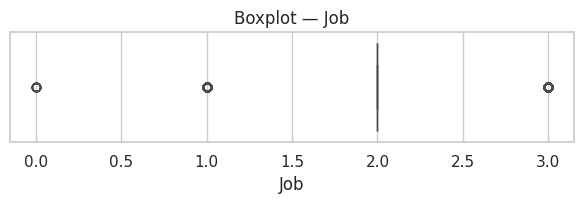

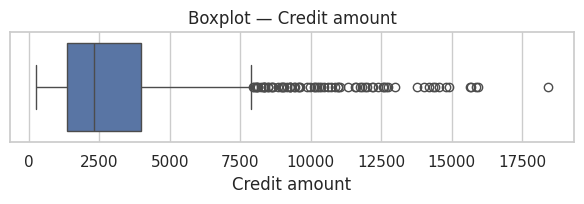

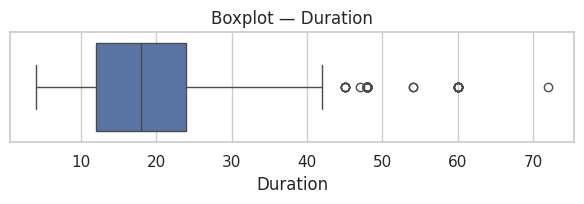

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 2.2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot — {col}")
    plt.tight_layout()
    plt.show()

## Analyse univariée — Catégorielles

### Barplots

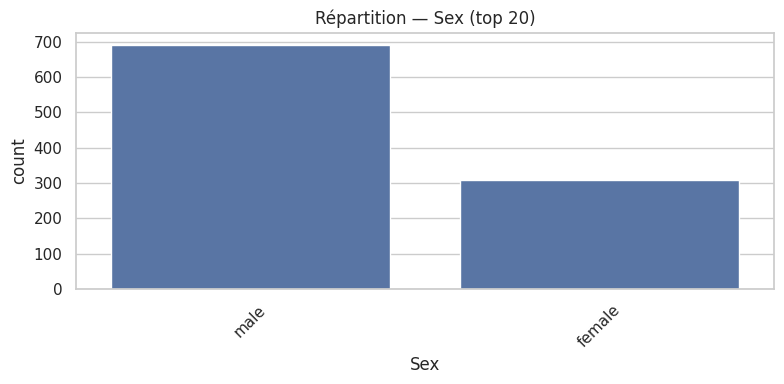

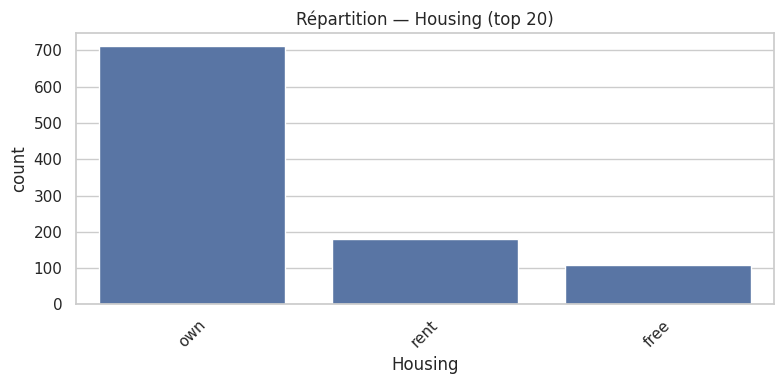

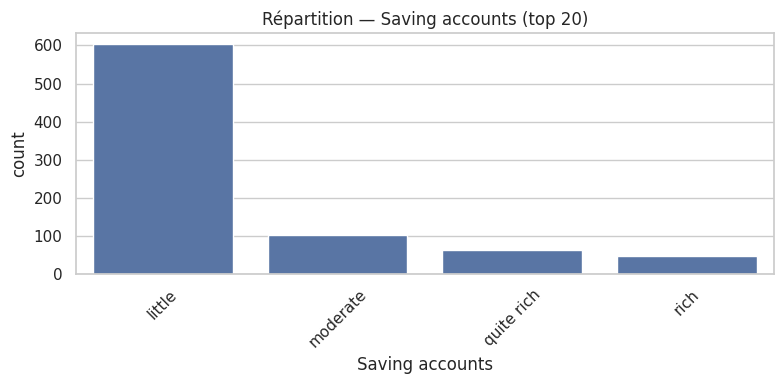

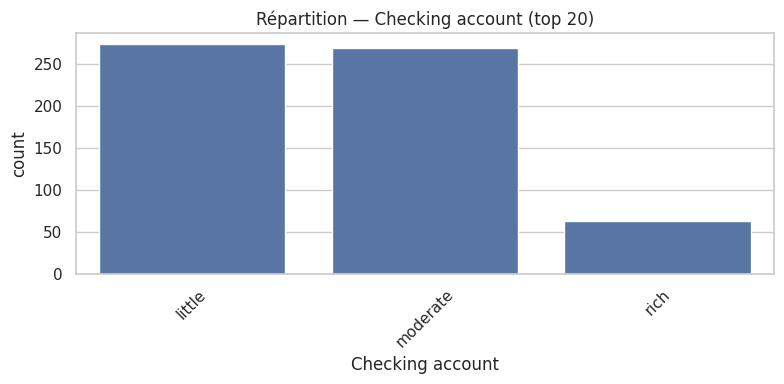

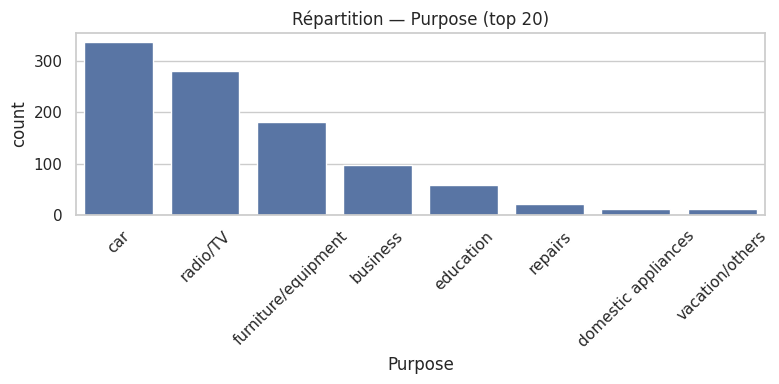

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index[:20]  # limite à 20 modalités si besoin
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Répartition — {col} (top 20)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Analyse bivariée

### Corrélations entre variables numériques

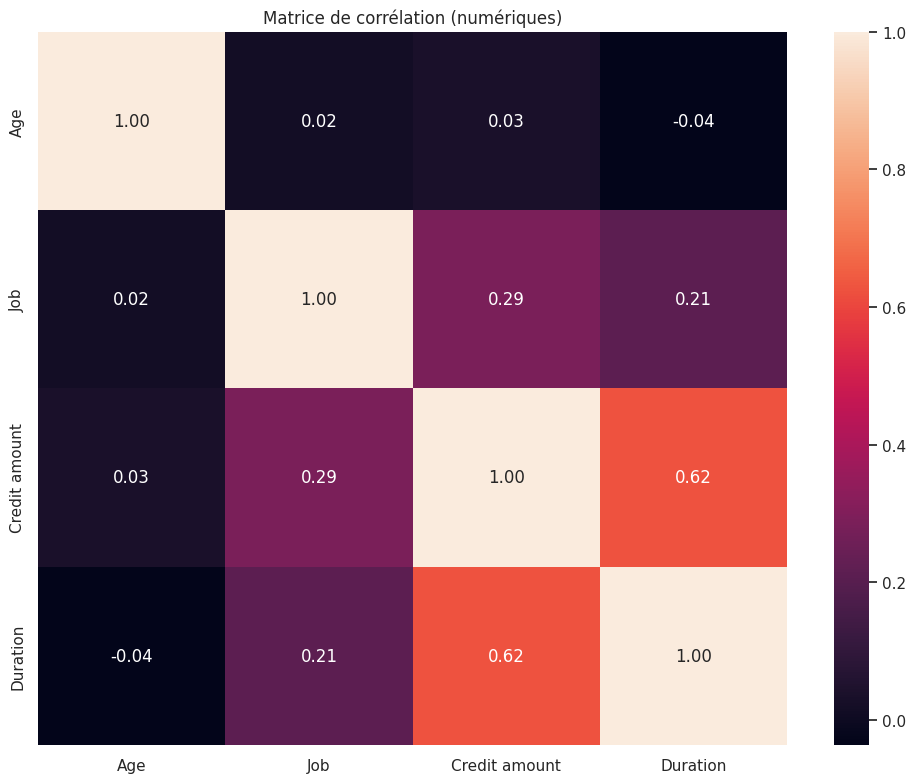

In [ ]:
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, fmt=".2f")
    plt.title("Matrice de corrélation (numériques)")
    plt.tight_layout()
    plt.show()
else:
    print("Pas assez de variables numériques pour une matrice de corrélation.")

# Modélisation

In [ ]:
# Variables catégorielles
cat_cols = [
    "Sex",
    "Housing",
    "Saving accounts",
    "Checking account",
    "Purpose"
]

# Variables numériques
num_cols = [
    "Age",
    "Job",
    "Duration"
]

target = "Credit amount"


### Imputation par une modalité "Unknown"

In [ ]:
df_unk = df.copy()
col_imput = ["Saving accounts", "Checking account"]
for col in col_imput:
    df_unk[col].fillna("Unknown", inplace=True)


/tmp/ipython-input-710636141.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unk[col].fillna("Unknown", inplace=True)


In [ ]:
import statsmodels.api as sm
X_unk = df_unk.drop(columns=target)
y_unk = df_unk[target]

X_encoded_unk = pd.get_dummies(X_unk, columns=cat_cols,drop_first=True).astype(int)

X_encoded_unk = sm.add_constant(X_encoded_unk)
model_unk = sm.OLS(y, X_encoded_unk).fit()
print(model_unk.summary())

                            OLS Regression Results                            
Dep. Variable:          Credit amount   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     43.64
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          1.77e-120
Time:                        04:41:57   Log-Likelihood:                -9045.2
No. Observations:                1000   AIC:                         1.813e+04
Df Residuals:                     979   BIC:                         1.824e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Imputation par prédiction

In [ ]:
# Transformer les variables dans col_imput en variables ordinales

from sklearn.preprocessing import OrdinalEncoder

df_ord = df.copy()
X_ord = df_ord.drop(columns=target)
y = df_ord[target]

enc = OrdinalEncoder()
X_ord[col_imput] = enc.fit_transform(X_ord[col_imput])

In [ ]:
X_ord.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose
0,67,male,2,own,NaN,0.0,6,radio/TV
1,22,female,2,own,0.0,1.0,48,radio/TV
2,49,male,1,own,0.0,NaN,12,education
3,45,male,2,free,0.0,0.0,42,furniture/equipment
4,53,male,2,free,0.0,0.0,24,car


<Axes: xlabel='Saving accounts', ylabel='count'>

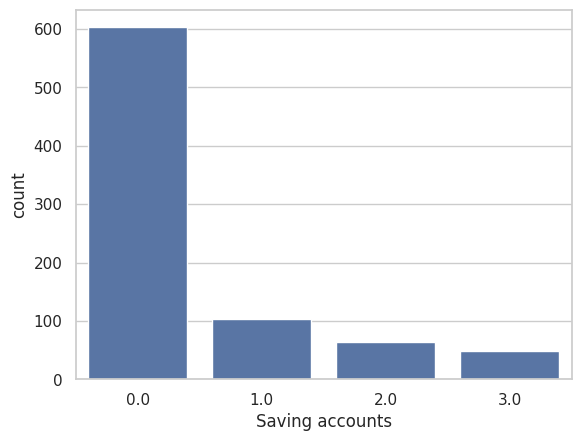

In [ ]:
# Visualiser graphiquement la variable Savings account
sns.countplot(data=X_ord, x="Saving accounts")


<Axes: xlabel='Checking account', ylabel='count'>

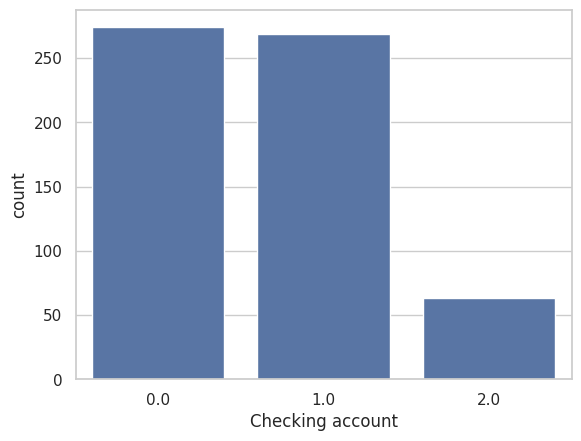

In [ ]:
# Visualiser graphiquement la variable Savings account
sns.countplot(data=X_ord, x="Checking account")

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor



X_ord_encoded = pd.get_dummies(X_ord, columns=['Sex', 'Housing', 'Purpose'],
                               drop_first=True)

imputer = IterativeImputer(
    estimator=ExtraTreesRegressor(
        n_estimators=100,
        random_state=42
    ),
    random_state=42
)

X_ord_imputed = imputer.fit_transform(X_ord_encoded)
X_ord_imputed = pd.DataFrame(X_ord_imputed, columns=X_ord_encoded.columns)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: xlabel='Saving accounts', ylabel='count'>

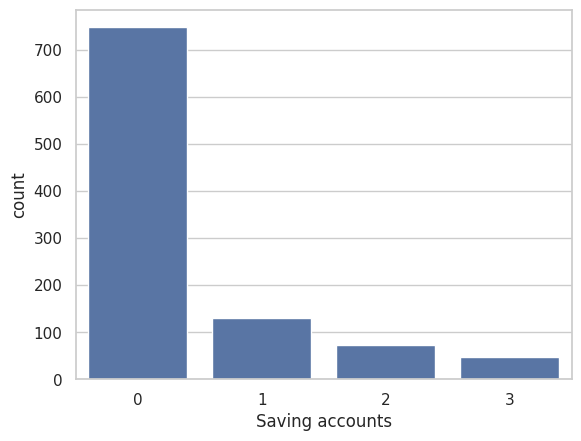

In [ ]:
# Visualiser graphiquement la variable Savings account
sns.countplot(x=X_ord_imputed["Saving accounts"].astype(int))

In [ ]:
X_ord_imputed = sm.add_constant(X_ord_imputed)

model = sm.OLS(y, X_ord_imputed).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Credit amount   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     56.53
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          1.92e-121
Time:                        04:42:29   Log-Likelihood:                -9053.2
No. Observations:                1000   AIC:                         1.814e+04
Df Residuals:                     984   BIC:                         1.822e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             